In [24]:
import pandas as pd
from PIL import Image
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image as jupyter_image
from IPython.display import display
from time import sleep
from IPython.display import clear_output
import sys
%matplotlib inline

In [4]:
pred = pd.read_csv("predictions/initial_resnet_101_no_freeze", names=["id","landmarks"])

In [6]:
pred["pred_id"] = pred["landmarks"].apply(lambda x: x.split(" ")[0])
pred["conf"] = pred["landmarks"].apply(lambda x: float(x.split(" ")[1]))

In [7]:
print(max(pred["conf"]))

0.1


In [8]:
print(min(pred["conf"]))

-5.378640174865723


In [9]:
pred["pred_id"].value_counts()

8815     4924
4273     4138
6656     1738
10888    1404
1954     1342
2064     1293
9876     1183
16373    1100
2071     1053
13953    1040
4877      985
12690     849
12132     799
4547      795
14172     791
9255      696
2403      682
13117     604
9783      570
4292      522
4160      519
2815      516
14053     503
5008      489
11982     473
5989      435
13859     432
15678     424
4810      410
15307     410
         ... 
9347        1
12456       1
3197        1
13798       1
6919        1
13218       1
13413       1
11643       1
3480        1
16148       1
2928        1
7588        1
11009       1
328         1
14567       1
9669        1
8571        1
12741       1
1175        1
11314       1
12919       1
5015        1
9250        1
8670        1
5400        1
17047       1
5551        1
14740       1
11322       1
3604        1
Name: pred_id, Length: 6367, dtype: int64

In [12]:
print(len(pred))
without_default = pred[pred["conf"] != 0.1]
print(len(without_default))

117703
112779


In [15]:
without_default_sorted = without_default.sort_values("conf", ascending=False)

In [16]:
without_default_sorted

id                     landmarks pred_id      conf
19550   772e873ceca1be23       4200 -7.62939453125e-06    4200 -0.000008
38037   afd418e91885b14c     6306 -7.2479248046875e-05    6306 -0.000072
41475   eb160d0b20faa553    6398 -9.34600830078125e-05    6398 -0.000093
116349  d20f36956be904a7   6306 -0.0001049041748046875    6306 -0.000105
61334   ccb9696e8c791e02   13477 -0.000110626220703125   13477 -0.000111
2090    ae806308c5162086   4273 -0.0001506805419921875    4273 -0.000151
36830   04a4ac8b371454f5   8477 -0.0001697540283203125    8477 -0.000170
53214   2f65a474c6702927     697 -0.000194549560546875     697 -0.000195
46468   0469d5af5b9d0b6c   6656 -0.0002765655517578125    6656 -0.000277
85616   53ac942321bb5069   12220 -0.000370025634765625   12220 -0.000370
3811    7517bdc7dad4439c      5008 -0.0003814697265625    5008 -0.000381
96316   3bb37a25dfd848ba       697 -0.0003814697265625     697 -0.000381
6293    726c677cb75946f8     8801 -0.00038909912109375    8801 -0.000389
9409    64155358e04be234      6656 -0.0004730224609375    6656 -0.000473
104452  582f7439e0579676    12982 -0.00052642822265625   12982 -0.000526
42149   6b0284893480cd76  11883 -0.0005664825439453125   11883 -0.000566
108395  3b5ad1004bc5f370   5008 -0.0007266998291015625    5008 -0.000727
51916   95c47932e90e4077   15301 -0.000743865966796875   15301 -0.000744
23780   8b3bd3bc9ee339b9   10986 -0.000751495361328125   10986 -0.000751
44884   3752c68cf3f9dfe0   5975 -0.0008220672607421875    5975 -0.000822
16504   1fa3ff46de3fdc5c   6707 -0.0008487701416015625    6707 -0.000849
76499   14fe11bbc54a8de5     5008 -0.00104522705078125    5008 -0.001045
93574   2ce1c8bc9c48e015    697 -0.0011615753173828125     697 -0.001162
105638  c95472e45577ae9f  10986 -0.0011730194091796875   10986 -0.001173
81499   7e2d4a6b6ba7f200   5008 -0.0012340545654296875    5008 -0.001234
30996   4eb18e8b4298041c      1104 -0.0013580322265625    1104 -0.001358
49476   7c349dc6e8356668   9004 -0.0013751983642578125    9004 -0.001375
101361  0857e91ef8689592   6656 -0.0014133453369140625    6656 -0.001413
2184    750fe03b003dc409    3181 -0.001476287841796875    3181 -0.001476
8361    99ea0fa4146ec667     3910 -0.00148773193359375    3910 -0.001488
...                  ...                           ...     ...       ...
17964   b7e6bb2fc8cef548       4473 -4.912702560424805    4473 -4.912703
8359    b700047f18c6167c       5786 -4.919492721557617    5786 -4.919493
113128  ffcef395aad8e78f      6663 -4.9352827072143555    6663 -4.935283
69701   1eb11ffec4636319      15590 -4.967559814453125   15590 -4.967560
34479   58ec46fc584d50aa       1954 -4.979644775390625    1954 -4.979645
34653   1d7936ac553c0e77       2118 -4.984563827514648    2118 -4.984564
79301   d74058f0c8b552d3       3242 -4.988348007202148    3242 -4.988348
30197   352da6df9094455b       1018 -5.004064559936523    1018 -5.004065
68583   2c51275271ae8036       4954 -5.009433746337891    4954 -5.009434
117437  94275a9a9406713d       8614 -5.014543533325195    8614 -5.014544
89857   d323448cbd19faf6       7206 -5.029263496398926    7206 -5.029263
94641   a4c462b60f46846c     13121 -5.0294036865234375   13121 -5.029404
88884   ca21d27acfb0699d      13788 -5.050119400024414   13788 -5.050119
29706   433eae134546ddd4      4055 -5.0525617599487305    4055 -5.052562
85806   4ab4d1e49a6df38b     14564 -5.0564727783203125   14564 -5.056473
99342   86caddfe8e4f8183       6656 -5.058725357055664    6656 -5.058725
109182  e56a4cf18bb9ec25      15934 -5.059913635253906   15934 -5.059914
60381   6faffc850598224b       3194 -5.060892105102539    3194 -5.060892
55445   00241bc3b567af00       8845 -5.067155838012695    8845 -5.067156
70246   5ba8cd2f59bffaaa      9799 -5.0922136306762695    9799 -5.092214
4232    6d2cbb67abba2cbd       4040 -5.107234954833984    4040 -5.107235
60575   4f2b56abbec3631d      10938 -5.121237754821777   10938 -5.121238
74745   67f9fd9eef05289f       5638 -5.122027397155762    5638 -5.122027
35285  

In [18]:
train_csv = pd.read_csv("/hdd/kaggle/landmarks/csv/train.csv")
print("Length before filter: ", len(train_csv))

expanded_descriptions = pd.read_csv("/hdd/kaggle/landmarks/csv/expanded_landmarks_descriptions.csv", names=["id", "description"])

Length before filter:  4132914


In [20]:
expanded_descriptions[expanded_descriptions["id"] == 4200]["description"]

34560    ('337ae9de6eef8db2', ['Pauluskerk_(Oegstgeest)'])
Name: description, dtype: object

In [37]:
train_csv[train_csv["landmark_id"] == 3910]

id                                                url  \
43399    cc92f7b50c546768  http://upload.wikimedia.org/wikipedia/commons/...   
237886   b677894a8f4cbac7  https://upload.wikimedia.org/wikipedia/commons...   
1057918  5f057a0d3571ad50  https://upload.wikimedia.org/wikipedia/commons...   
1456604  4cf972718759a2e5  http://upload.wikimedia.org/wikipedia/commons/...   
3144352  8ecf9ba4775dcbcf  http://upload.wikimedia.org/wikipedia/commons/...   
3965002  94b367712837513b  http://upload.wikimedia.org/wikipedia/commons/...   
4042342  4fc732926f484afd  http://upload.wikimedia.org/wikipedia/commons/...   

         landmark_id  
43399           3910  
237886          3910  
1057918         3910  
1456604         3910  
3144352         3910  
3965002         3910  
4042342         3910

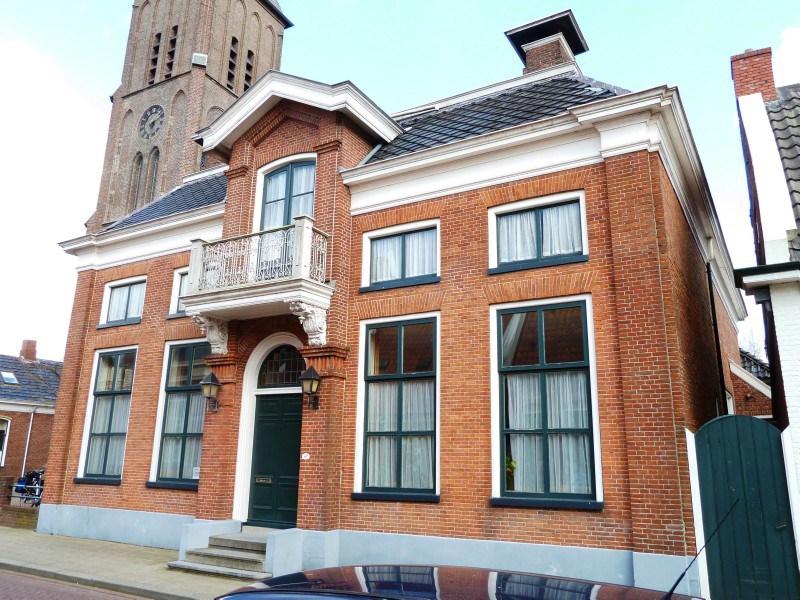

In [38]:
pil_image = Image.open("/hdd/kaggle/landmarks/all_images/cc92f7b50c546768.jpg")
pil_image

In [ ]:
# pil_image = Image.open("/hdd/kaggle/landmarks/test_images/99ea0fa4146ec667.jpg")

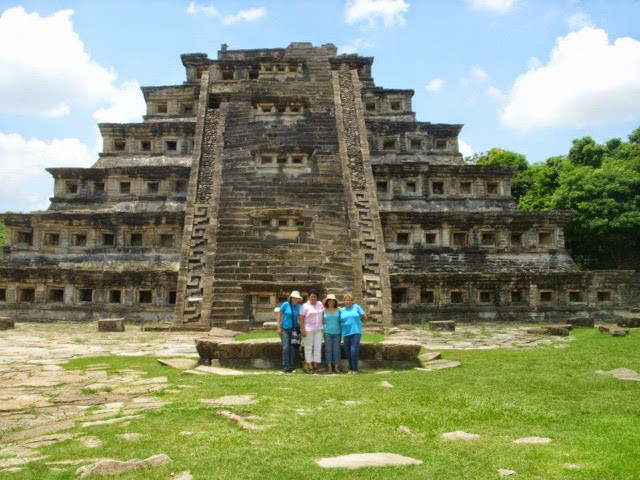

In [39]:
pil_image = Image.open("/hdd/kaggle/landmarks/test_images/99ea0fa4146ec667.jpg")
pil_image